# Problème Réseaux de neurones

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(v):
    return np.tanh(v)

In [3]:
def sigmoid_derivative(v):
    return 1 - sigmoid(v)**2

In [4]:
def mlpclass(y):
    #Prend en entrée une matrice contenant N exemples en colonne et 10 lignes 
    #Retourne les classes de la sortie y 
    if len(y.shape)==1:
        res = np.argmax(y)
    else: 
        res = []
        for i in range(y.shape[1]):
            res.append(np.argmax(y[:,i]))
    return res

In [43]:
def label2target(c,nb_classe):
    #Calcule les vecteurs de sortie désirée en fonction des classes en entrée
    n = len(c)
    res = -np.ones((nb_classe,n))
    for i in range(n):
        res[c[i]-1,i] = 1
    return res

In [6]:
def score(label, pred):
    #Retourne le score de la prédiction
    verification = label == pred
    res = [e for e in verification if e ==True]
    nb = len(res)
    taux = round(len(res)/len(verification),2)
    return {'nb': nb,'taux': taux }

In [7]:
def sqrerror(error):
    #Calcul l'erreur au sein des moindres carrés
    sqrmatrix = [e**2 for e in error]
    res = sum(sum(sqrmatrix))
    return res

In [8]:
class NeuralNetwork:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, n_out):
        #Matrice d'entrée augmentée
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        #Matrice de poids aléatoires entre 0 et w_sup
        self.weights     = (np.random.rand(self.input_train.shape[0],n_out)-np.random.randint(0,2,(self.input_train.shape[0],n_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        
    def feedforward(self, train):
        #Calcul une propagation dans le réseau avec les données d'entrainement si train = True
        #et avec les données de test si train = False
        if train == True:
            self.layer = np.dot(self.input_train.T, self.weights)
            self.output = sigmoid(self.layer)
        else:
            self.layer = np.dot(self.input_test.T, self.weights)
            self.output = sigmoid(self.layer)

    def backprop(self, lr):
        #Calcul de l'erreur
        self.error =  self.output - self.y_train
        #Calcul de la matrice d'évolution des poids
        d_weights = np.dot(self.input_train, (2*self.error * sigmoid_derivative(self.layer)))
        #Calcul des nouveaux poids
        self.weights -= lr*d_weights
        
    def train(self, it, lr):
        #Entraine le réseau de neurones et complète une liste errrors des erreurs quadratiques
        for i in range(it):
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            
    def test(self,train):
        #Teste la performance du réseau sur la base d'entrainement si train = True, base de test sinon
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

In [44]:
BaseApp_1 = np.load('data/BaseApp_1.npy')
LabelApp_1 = np.load('data/LabelApp_1.npy')
LabelApp_1 = np.array(label2target(LabelApp_1,3)).T

BaseApp_2 = np.load('data/BaseApp_2.npy')
LabelApp_2 = np.load('data/LabelApp_2.npy')
LabelApp_2 = np.array(label2target(LabelApp_2,3)).T


In [45]:
nn = NeuralNetwork(BaseApp_1,LabelApp_1,BaseApp_2,LabelApp_2, w_sup = 1e-3, n_out=3)

In [46]:
it, lr = 100, 1e-6
nn.train(it,lr)

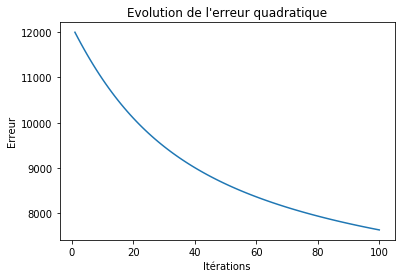

{'nb': 3369, 'taux': 0.84}

In [47]:
iterations = np.linspace(1,it,it)
plt.plot(iterations,nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
nn.test(train = True)

In [48]:
nn.test(train=False)

{'nb': 2902, 'taux': 0.73}

In [90]:
class NeuralNetworkAdaptatif:
    def __init__(self, x_train, y_train, x_test, y_test, w_sup, n_out, Lr_rho, Lr_sigma):
        #Matrice d'entrée augmentée
        self.input_train = np.concatenate((np.ones((1,np.shape(x_train)[1])),x_train),axis=0)
        self.input_test  = np.concatenate((np.ones((1,np.shape(x_test)[1])),x_test),axis=0)
        #Matrice de poids aléatoires entre 0 et w_sup
        self.weights     = (np.random.rand(self.input_train.shape[0],n_out)-np.random.randint(0,2,(self.input_train.shape[0],n_out)))*w_sup
        self.y_train     = y_train 
        self.y_test      = y_test
        self.output      = np.zeros(y_train.shape)
        self.errors      = []
        self.Lr_rho = Lr_rho
        self.Lr_sigma = Lr_sigma
        
    def feedforward(self, train):
        #Calcul une propagation dans le réseau avec les données d'entrainement si train = True
        #et avec les données de test si train = False
        if train == True:
            self.layer = np.dot(self.input_train.T, self.weights)
            self.output = sigmoid(self.layer)
        else:
            self.layer = np.dot(self.input_test.T, self.weights)
            self.output = sigmoid(self.layer)

    def backprop(self, lr):
        #Calcul de l'erreur
        self.error =  self.output - self.y_train
        #Calcul de la matrice d'évolution des poids
        d_weights = np.dot(self.input_train, (2*self.error * sigmoid_derivative(self.layer)))
        #Calcul des nouveaux poids
        self.weights -= lr*d_weights
        
    ############################# IMPLEMENTATI0N PAS ADAPTATIF ##############################
        
    def train(self, it, lr):
        #Entraine le réseau de neurones et complète une liste errrors des erreurs quadratiques
        for i in range(it):
            print(i)
            self.feedforward(train = True)
            self.backprop(lr)
            self.errors.append(sqrerror(self.error))
            if i>1:
                if self.errors[i]>self.errors[i-1]:
                    err = self.errors[i]
                    while err > self.errors[i-1]:
                        lr = lr*self.Lr_sigma
                        #print(lr)
                        self.backprop(lr)
                        err = sqrerror(self.error)
                        #print('err[i]',err)
                        #print('err[i-1]',self.errors[i-1])
                    self.errors[i] = err
                else:
                    lr = lr*self.Lr_rho
                    
                
            
    def test(self,train):
        #Teste la performance du réseau sur la base d'entrainement si train = True, base de test sinon
        self.feedforward(train)
        self.pred = np.array(mlpclass(self.output.T))
        if train == True:
            label = np.array(mlpclass(self.y_train.T))
        else:
            label = np.array(mlpclass(self.y_test.T))
        return score(label,self.pred)

In [91]:
adaptatif_nn = NeuralNetworkAdaptatif(BaseApp_1,LabelApp_1,BaseApp_2,LabelApp_2, w_sup = 1e-3, 
                                      n_out=3, Lr_rho=1.5, Lr_sigma=0.1)

In [66]:
%qtconsole

In [93]:
it, lr = 20, 1e-6
adaptatif_nn.train(it,lr)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


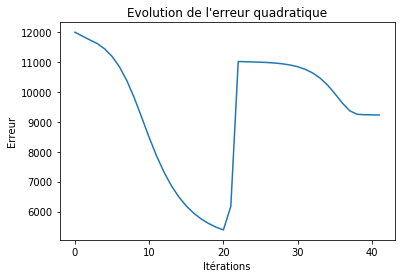

{'nb': 3493, 'taux': 0.87}

In [97]:
iterations = np.linspace(1,it,it)
plt.plot(adaptatif_nn.errors)
plt.title("Evolution de l'erreur quadratique")
plt.xlabel('Itérations')
plt.ylabel('Erreur')
plt.show()
nn.test(train = True)

In [98]:
nn.test(train=False)

{'nb': 2981, 'taux': 0.75}